In [1]:
"""
* 분류 : 종속변수의 데이터 형태가 범주형(도미 또는 빙어, 0과 1)데이터 사용
 - 분류에 사용되는 모델(클래스)의 이름 뒤에는 "Classifier"가 붙어 있습니다.
 - 분류예측
* 회귀 : 종속변수의 데이터 형태가 연속형(무게 또는 길이 등등..)데이터 사용
 - 회귀에 사용되는 모델(클래스)의 이름 뒤에는 "Regressor"가 붙어 있습니다.
 - 회귀예측
 
<KNN 회귀모델 작동방식>
 - 분류에서 사용한 방식과 동일하게 임의 예측값과 가장 가까운 이웃의 개수 사용
 - 분류에서는 가장 가까운 이웃의 비율을 이용했다면..
 - 회귀에서는 가장 가까운 이웃의 평균을 이용합니다.
 
 * 분류에서는 범주 데이터가 정해져 있기 때문에 0 또는 1 둘 중 하나의 값을 반환했다면,
 ** 회귀에서는 이웃의 평균값 또는 평균에 근사한 값을 반환해 줍니다.
"""

'\n* 분류 : 종속변수의 데이터 형태가 범주형(도미 또는 빙어, 0과 1)데이터 사용\n - 분류에 사용되는 모델(클래스)의 이름 뒤에는 "Classifier"가 붙어 있습니다.\n - 분류예측\n* 회귀 : 종속변수의 데이터 형태가 연속형(무게 또는 길이 등등..)데이터 사용\n - 회귀에 사용되는 모델(클래스)의 이름 뒤에는 "Regressor"가 붙어 있습니다.\n - 회귀예측\n \n<KNN 회귀모델 작동방식>\n - 분류에서 사용한 방식과 동일하게 임의 예측갑소가 가장 가까운 이웃의 개수 사용\n - 분류에서는 가장 가까운 이웃의 비율을 이용했다면..\n - 회귀에서는 가장 가까운 이웃의 평균을 이용합니다.\n \n * 분류에서는 범주 데이터가 정해져 있기 때문에 0 또는 1 둘 중 하나의 값을 반환했다면,\n ** 회귀에서는 이웃의 평균값 또는 평균에 근사한 값을 반환해 줍니다.\n'

### 데이터 수집

In [2]:
"""
* 농어의 길이만으로 무게 예측하기
 - 길이 : 독립변수
 - 무게 : 종속변수
"""

'\n* 농어의 길이만으로 무게 예측하기\n - 길이 : 독립변수\n - 무게 : 종속변수\n'

In [3]:
import numpy as np

In [4]:
### 농어 길이
perch_length = np.array(
                                [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                                 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                                 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                                 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                                 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                                 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
                                 )

### 농어 무게
perch_weight = np.array(
                                [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                                 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                                 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
                                 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                                 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                                 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                                 1000.0, 1000.0]
                                 )

In [5]:
perch_length.shape, perch_weight.shape

((56,), (56,))

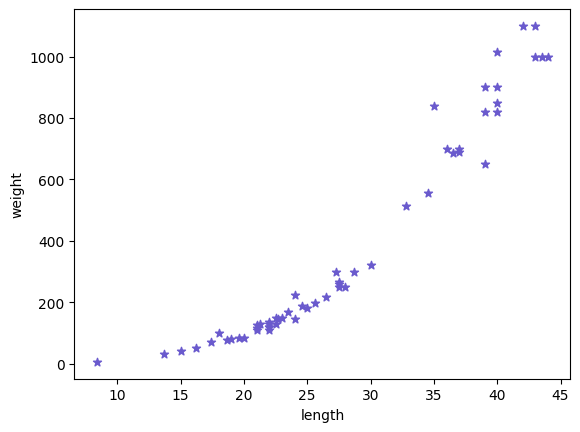

In [6]:
### 데이터 시각화하기 : 산점도
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight, marker="*", c="slateblue", label="pred")

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

### (해석)
# - 길이의 값이 커질수록, 무게가 커지는 양의 상관관계를 나타내고 있음
# - 우상향의 분포를 나타냄
# - 초반에는 약간의 라운드(곡선) 형태를 띄다가,
# - 중반부터는 직선의 형태를 띕니다.

### 회귀에서 사용하는 일반적인 공식
# - 직선의 방정식(y) = ax + b
#    (x는 독립변수 데이터, a는 가중치값, b는 y절편)
# - 포물선의 방정식(y) = ax^2 + bx + c
#    (x는 독립변수 데이터, a와 b는 가중치값, c는 y절편)

### 전처리하기

In [7]:
### 훈련데이터와 테스트데이터로 분류하기
# - 변수명 : train_input, test_input, train_target, test_target
# - 랜덤하게 비율에 맞게 분류하는 함수 사용
# - 분류 비율은 75 : 25로 합니다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
### 꼭 암기!!!!(딥러닝 때도 사용함)
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42, test_size=0.25)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42,) (14,) (42,) (14,)


In [10]:
### 독립변수는 2차원으로 사용해야 합니다.
# - 넘파이 함수 중에 차원 변환하는 함수 사용
# - target 데이터는 절.대! 건들면 안됨
# - reshape(행, 열)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

### 훈련시키기

In [11]:
### KNN 회귀모델 라이브러리 불러들이기
from sklearn.neighbors import KNeighborsRegressor

In [12]:
### 훈련모델 생성하기
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [13]:
### 훈련시키기
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
### 정확도 확인하기
### 회귀에서는 '정확도'라는 용어 대신에 "결정계수(R^2)"을 사용합니다.
# - 회귀에서는 정확한 숫자를 맞히는 것은 거의 불가능
# - 결정계수 값의 범위 : 0~1 사이의 값
#   (1에 가까울수록 학습능력이 좋다라고 표현합니다.)
# - 회귀를 해석할 때는 결정계수의 값이 1에 가까울수록 결정력(예측력)이 좋은 모델이라고 판단합니다.
knr.score(test_input, test_target)

0.992809406101064

### 예측오차 확인하기

In [15]:
### 테스트데이터를 이용해서 예측오차 확인하기
from sklearn.metrics import mean_absolute_error

In [16]:
test_pred = knr.predict(test_input)
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [17]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [18]:
### 예측오차 확인하기
# - 평균 절대값 오차를 계산해서 반환해 줍니다.
mean_absolute_error(test_target, test_pred)
### (해석)
# - 해당 모델을 이용해서 예측을 할 경우에는
# - 평균적으로 약 19.157g 정도의 차이가 있는 데이터를 예측할 수 있음

19.157142857142862

### 데이터의 정확도(결정력)을 높이기 위한 과적합 여부에 대한 처리

In [19]:
"""
<순서>
1. 데이터 수집
2. 데이터 전처리(결측치, 중복치, 이상치)
3. 데이터 후처리(차원 정의, 정규화, 훈련/테스트 분류)
4. 훈련모델 생성
5. 훈련시키기
6. 훈련모델 정확도(결정계수) 확인하기 (항상 훈련모델 값이 커야 함)
7. 정확도(결정계수)가 낮은 경우 
   - 과적합여부 확인 및 처리하기(머신러닝에서의 전처리 과정)
   - 과적합여부 처리가 있는 경우-> 3번~6번 재확인(하이퍼파라메터 튜닝)
8. 예측하기
"""

'\n<순서>\n1. 데이터 수집\n2. 데이터 전처리(결측치, 중복치, 이상치)\n3. 데이터 후처리(차원 정의, 정규화, 훈련/테스트 분류)\n4. 훈련모델 생성\n5. 훈련시키기\n6. 훈련모델 정확도(결정계수) 확인하기 (항상 훈련모델 값이 커야 함)\n7. 정확도(결정계수)가 낮은 경우 \n   - 과적합여부 확인 및 처리하기(머신러닝에서의 전처리 과정)\n   - 과적합여부 처리가 있는 경우-> 3번~6번 재확인(하이퍼파라메터 튜닝)\n8. 예측하기\n'

In [20]:
knr.n_neighbors = 5
knr.fit(train_input, train_target)

### 훈련 평가결과
train_score = knr.score(train_input, train_target)

### 테스트 평가결과
test_score = knr.score(test_input, test_target)

### 훈련 Vs 테스트 결과 확인
train_score, test_score

### (해석)
# 훈련결과가 테스트결과보다 낮게 나왔기 때문에
# - 예측모델로 사용할 수 없음
# - 즉, 과소적합이 발생한 모델임

(0.9698823289099254, 0.992809406101064)

In [21]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

### 훈련 평가결과
train_score = knr.score(train_input, train_target)

### 테스트 평가결과
test_score = knr.score(test_input, test_target)

### 훈련 Vs 테스트 결과 확인
train_score, test_score

### (해석)
# 훈련결과가 테스트결과보다 높게 나왔기 때문에
# - 예측모델로 사용할 수 있음
# - 즉, 과대 및 과소적합이 발생하지 않은 일반화된 모델임

(0.9804899950518966, 0.9746459963987609)

In [22]:
"""
<과적합 여부는 모델을 평가하기 위한 방법으로 사용>
 - 모델을 평가한다는 것은 사용할 수 있을지 없을지를 판단하는 기준임
 * 과소적합 : 훈련정확도 < 테스트정확도
 * 과대적합 : 훈련정확도 > 테스트정확도 (매우 많이 차이나는 경우)
 - 과소적합이 발생한 경우에는 훈련모델은 무조건 사용할 수 없음
 - 과대적합의 범위에 대한 기준은 없으나, 일반적으로 훈련과 테스트의 차이가 0.1을 벗어나는 경우..
"""

'\n<과적합 여부는 모델을 평가하기 위한 방법으로 사용>\n - 모델을 평가한다는 것은 사용할 수 있을지 없을지를 판단하는 기준임\n * 과소적합 : 훈련정확도 < 테스트정확도\n * 과대적합 : 훈련정확도 > 테스트정확도 (매우 많이 차이나는 경우)\n - 과소적합이 발생한 경우에는 훈련모델은 무조건 사용할 수 없음\n - 과대적합의 범위에 대한 기준은 없으나, 일반적으로 훈련과 테스트의 차이가 0.1을 벗어나는 경우..\n'

In [ ]:
### 가장 적합한 이웃의 갯수 확인하기 : 하이퍼파라메터 튜닝
# 가장 적합한 이웃의 갯수 확인 방법
#  1. 최소적합이 일어나지 않아야 함
#  2. 오차평균이 작아야 함
#  ** 위 1, 2번을 만족할 때의 이웃의 갯수를 선정하는 것이 일반적임

In [28]:
import pandas as pd

In [42]:
list_1 = []
for n in range(3, len(train_input), 2) :
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    train_score = knr.score(train_input, train_target)
    test_score = knr.score(test_input, test_target)
    
    # print(n, (train_score - test_score))
    
    list_0 = [n, train_score, test_score, (train_score - test_score)]
    list_1.append(list_0)
    
    df = pd.DataFrame(list_1, columns = ["이웃 갯수", "훈련데이터", "테스트데이터", "훈련 - 테스트"])
df

,이웃 갯수,훈련데이터,테스트데이터,훈련 - 테스트
0,3,0.980490,0.974646,0.005844
1,5,0.969882,0.992809,-0.022927
2,7,0.976117,0.978138,-0.002021
3,9,0.969331,0.969265,0.000066
4,11,0.951576,0.970280,-0.018704
5,13,0.941342,0.963904,-0.022562
6,15,0.930201,0.955483,-0.025282
7,17,0.908778,0.931406,-0.022628
8,19,0.878208,0.900994,-0.022785
9,21,0.841092,0.859692,-0.018600


In [43]:
df[df["훈련 - 테스트"] > 0]

,이웃 갯수,훈련데이터,테스트데이터,훈련 - 테스트
0,3,0.980490,0.974646,0.005844
3,9,0.969331,0.969265,0.000066
17,37,0.289701,0.278919,0.010783
18,39,0.181517,0.156391,0.025126
19,41,0.059782,0.013071,0.046711


In [45]:
### 강사님
cnt = 21
train_score_list = []
test_score_list = []
mae_list = []

for n in range(3, cnt, 2) :
    ### 이웃의 갯수 정의하기
    knr.n_neighbors = n
    
    ### 훈련시키기
    knr.fit(train_input, train_target)
    
    ### 훈련 결정계수(정확도)
    train_score_list.append(knr.score(train_input, train_target))
    
    ### 테스트 결정계수(정확도)
    test_score_list.append(knr.score(test_input, test_target))
    
    ### 예측하기
    test_pred = knr.predict(test_input)
    
    ### 평균절대오차값
    mae_list.append(mean_absolute_error(test_target, test_pred))
    
print(train_score_list)
print(test_score_list)
print(mae_list)

[0.9804899950518966, 0.9698823289099254, 0.9761170732051527, 0.9693310367551284, 0.9515761381539326, 0.9413423450130075, 0.930201118360776, 0.9087778943199959, 0.8782082893573573]
[0.9746459963987609, 0.992809406101064, 0.9781383949643516, 0.9692647749722698, 0.970279643030474, 0.9639044643206888, 0.9554827691127018, 0.9314058693169347, 0.900993697623706]
[35.42380952380951, 19.157142857142862, 32.512244897959185, 43.987301587301594, 43.43896103896105, 45.42197802197802, 49.852380952380955, 60.017647058823535, 69.05413533834586]


In [49]:
### 데이터프레임으로 만들기
df = pd.DataFrame([[n, train_s, test_s, train_s-test_s,mae]
                     for n, train_s, test_s, mae 
                     in zip(range(3, cnt, 2), train_score_list, test_score_list, mae_list)],
                     columns=["n_neighbors", "train_score", "test_score", "minus", "mae"])
df

### (해석)
# - 이웃의 갯수 3일 때와 9일 때가 과소적합이 일어나지 않으며, 이 때는 과대적합도 일어나지 않음
# - 이웃의 갯수 3일 때와 9일 때 중에 오차평균이 가장 작은 3일 때의 값을 선택
# - 나머지 이웃들은 과소적합(음수값)이 일어났기에 훈련모델로는 적합하지 않음
# ** 최종 결론,
#    - 이웃의 갯수 3일 때 과대/과소 적합이 일어나지 않으며, 오차평균이 가장 작음
#    - 이웃의 갯수 3일 때 훈련모델의 정확도(결정계수)는 0.98로 매우 훌륭한 모델로 여겨짐

,n_neighbors,train_score,test_score,minus,mae
0,3,0.980490,0.974646,0.005844,35.423810
1,5,0.969882,0.992809,-0.022927,19.157143
2,7,0.976117,0.978138,-0.002021,32.512245
3,9,0.969331,0.969265,0.000066,43.987302
4,11,0.951576,0.970280,-0.018704,43.438961
5,13,0.941342,0.963904,-0.022562,45.421978
6,15,0.930201,0.955483,-0.025282,49.852381
7,17,0.908778,0.931406,-0.022628,60.017647
8,19,0.878208,0.900994,-0.022785,69.054135


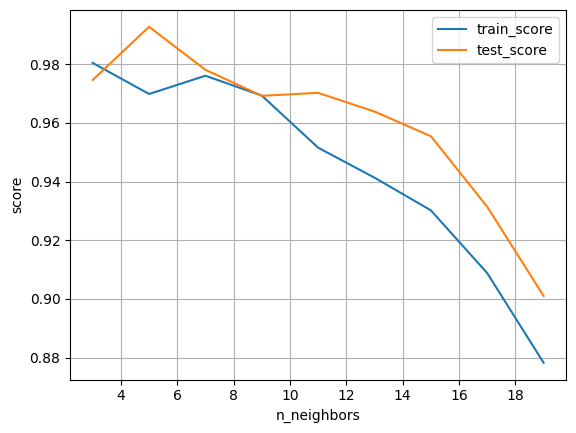

In [61]:
### 선그래프로 그리기
# - 이웃의 갯수일 때의, 훈련 및 테스트 정확도를 선그래프로 그리기
# - x축은 이웃의 갯수가 되며, y축은 훈련 및 테스트의 정확도(결정계수)가 됩니다.
df.plot("n_neighbors", ["train_score", "test_score"])

plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.grid()
plt.show()

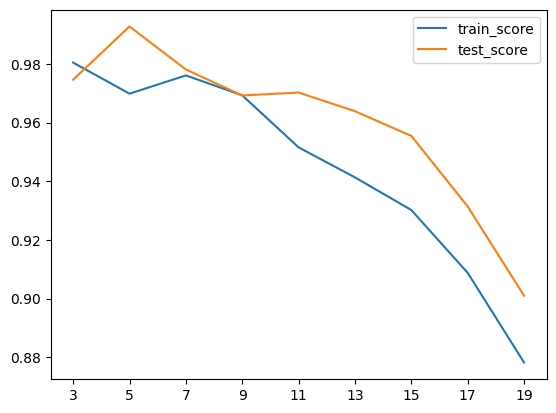

In [64]:
### 강사님
plt.plot(train_score_list, label="train_score")
plt.plot(test_score_list, label="test_score")
# - xticks(현재 x축 값, 바꿀 x축 값)
plt.xticks(range(0, 9), range(3, cnt, 2))
plt.legend()
plt.show()